<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`person_age`|`int`|Age|
|`person_income`|`int`|Annual Income|
|`person_home_ownership`|`str`|The number of bedrooms|
|`person_emp_length`|`int`|Employment length (in years)|
|`loan_intent`|`str`|Loan intent|
|`loan_grade`|`str`|Loan grade|
|`loan_amnt`|`int`|Loan amount|
|`loan_int_rate`|`float`|Interest rate|
|`loan_percent_income`|`float`|Percent income|
|`cb_person_default_on_file`|`bool`|Historical default|
|`cb_preson_cred_hist_length`|`int`|Credit history length|
| `loan_status` | `int(bool)` | Loan status (0 is non default 1 is default) , (**our target**)|

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Check the shape  of the data

In [3]:
df.shape

(32581, 12)

Checking how many unique value on this dataset

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f"Feature: {column}")
    print("Unique values:")
    print(num_unique)
    print("-" * 50)

Feature: person_age
Unique values:
58
--------------------------------------------------
Feature: person_income
Unique values:
4295
--------------------------------------------------
Feature: person_home_ownership
Unique values:
4
--------------------------------------------------
Feature: person_emp_length
Unique values:
37
--------------------------------------------------
Feature: loan_intent
Unique values:
6
--------------------------------------------------
Feature: loan_grade
Unique values:
7
--------------------------------------------------
Feature: loan_amnt
Unique values:
753
--------------------------------------------------
Feature: loan_int_rate
Unique values:
349
--------------------------------------------------
Feature: loan_status
Unique values:
2
--------------------------------------------------
Feature: loan_percent_income
Unique values:
77
--------------------------------------------------
Feature: cb_person_default_on_file
Unique values:
2
------------------------

In [5]:
def read_data(fname):
    """
    Reads a CSV file into a pandas DataFrame, identifies and removes duplicate rows,
    and prints information about the shape of the data before and after duplicate removal.

    Parameters:

    fname : str
    The filename or path to the CSV file to be read.

    Returns:

    pd.DataFrame
    The DataFrame containing the data from the CSV file after removing duplicates.

    """
    df = pd.read_csv(fname)
    print("Data shape raw               : ", df.shape)
    num_duplicated = df.duplicated().sum()
    print("Number of duplicate order id : ",num_duplicated)
    df = df.drop_duplicates(keep='last')
    print("Data shape after dropping    : ", df.shape)
    print("Data shape final             : ", df.shape)
    return df

In [6]:
data = read_data(fname='credit_risk_dataset.csv')

Data shape raw               :  (32581, 12)
Number of duplicate order id :  165
Data shape after dropping    :  (32416, 12)
Data shape final             :  (32416, 12)


In [7]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
def split_input_output(data,target_col):
    """
    Splits the input DataFrame into features (X) and target (y) based on the specified target column.

    Parameters:

    data : pd.DataFrame
    The input DataFrame containing both features and the target column.

    target_col : str
    The name of the column in `data` that contains the target variable.

    Returns:

    tuple of pd.DataFrame and pd.Series
        - X : pd.DataFrame
            The DataFrame containing the feature columns (all columns except `target_col`).
        - y : pd.Series
            The Series containing the target variable (the `target_col` from the input DataFrame).

    """
    output_data = data[target_col]
    data = data.drop(target_col, axis=1)
    print(f'X shape: {data.shape}')
    print(f'y shape: {output_data.shape}')
    return data, output_data

In [9]:
X, y = split_input_output(data=data,
                          target_col='loan_status')

X shape: (32416, 11)
y shape: (32416,)


In [10]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [11]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

checking the distribution of the data (0 is non default and 1 is default)

In [12]:
y.value_counts(normalize=True)

loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
def split_train_test(X,y,test_size, seed):
    """
    Splits the dataset into training and testing sets for both features (X) and target (y) using stratified sampling.

    Parameters:

    X : pd.DataFrame or np.ndarray
        The feature set (input data) to be split.

    y : pd.Series or np.ndarray
        The target variable corresponding to the feature set.

    test_size : float
        The proportion of the dataset to include in the test split.
        Should be between 0.0 and 1.0.

    seed : int
        The random seed for reproducibility of the split.

    Returns:

    tuple of pd.DataFrame/np.ndarray:
        - X_train : pd.DataFrame or np.ndarray
            The feature set for training.
        - X_test : pd.DataFrame or np.ndarray
            The feature set for testing.
        - y_train : pd.Series or np.ndarray
            The target variable for training.
        - y_test : pd.Series or np.ndarray
            The target variable for testing.

    Notes:
    ------
    - The function uses `train_test_split` from `sklearn.model_selection` to perform the split.
    - Stratified sampling is applied to ensure the target variable distribution is maintained between the training and test sets.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed,stratify=y)
    print(f'X_train shape: {X_train.shape}')
    print(f'X_test shape: {X_test.shape}')
    print(f'y_train shape: {y_train.shape}')
    print(f'y_test shape: {y_test.shape}')

    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_not_train, y_train, y_not_train = split_train_test(X=X,y=y, test_size=0.2, seed=123)
X_valid, X_test, y_valid, y_test = split_train_test(X=X_not_train,y=y_not_train,test_size=0.5,seed=123)

X_train shape: (25932, 11)
X_test shape: (6484, 11)
y_train shape: (25932,)
y_test shape: (6484,)
X_train shape: (3242, 11)
X_test shape: (3242, 11)
y_train shape: (3242,)
y_test shape: (3242,)


checking the distribution of the data (0 is non default and 1 is default)

In [15]:
y_train.value_counts(normalize=True)

loan_status
0    0.781313
1    0.218687
Name: proportion, dtype: float64

In [16]:
y_test.value_counts()

loan_status
0    2533
1     709
Name: count, dtype: int64

In [17]:
y_test.value_counts(normalize = True)

loan_status
0    0.781308
1    0.218692
Name: proportion, dtype: float64

check the distribution of  the data, i use 80% of the data for train data, 10 % for valid data and 10 % for test data

In [18]:
print(len(X_train)/len(X))
print(len(X_valid)/len(X))
print(len(X_test)/len(X))

0.7999753208292202
0.10001233958538994
0.10001233958538994


In [19]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30,21,11520,OWN,5.0,MEDICAL,B,2000,11.12,0.17,N,3
25221,28,81120,MORTGAGE,5.0,HOMEIMPROVEMENT,B,5200,11.49,0.06,N,7
32528,65,120000,MORTGAGE,0.0,PERSONAL,B,12000,11.48,0.10,N,21
9322,26,62000,RENT,7.0,PERSONAL,C,8000,12.99,0.13,N,4
7010,26,51000,MORTGAGE,2.0,MEDICAL,A,4000,5.99,0.08,N,4


EDA

Checking missing value for all of the features

In [20]:
100 * (X_train.isna().sum(0) / len(X_train))

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.749499
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.636742
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

from the result we can know that, person_emp_length and loan_int_rate have missing value

importing libraries for data visualizing

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
def split_numerical_categorical(data, num_cols, cat_cols):
    '''
    Splits the input DataFrame into numerical and categorical datasets based on the provided column names.

    Parameters:

    data : pd.DataFrame
    The input DataFrame containing both numerical and categorical columns.

    num_cols : list of str
    The list of column names in `data` corresponding to numerical features.

    cat_cols : list of str
    The list of column names in `data` corresponding to categorical features.

    Returns:

    tuple of pd.DataFrame:
        - numerical_data : pd.DataFrame
            The DataFrame containing only the numerical columns.
        - categorical_data : pd.DataFrame
            The DataFrame containing only the categorical columns.

    '''
    numerical_data = data[num_cols]
    categorical_data = data[cat_cols]
    print(f'Data num shape: {numerical_data.shape}')
    print(f'Data cat shape: {categorical_data.shape}')

    return numerical_data, categorical_data

In [23]:
num_cols=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income', 'cb_person_cred_hist_length']
cat_cols=['person_home_ownership','loan_intent','cb_person_default_on_file','loan_grade']

In [24]:
X_train_num, X_train_cat = split_numerical_categorical(data=X_train,num_cols=num_cols,cat_cols=cat_cols)

Data num shape: (25932, 7)
Data cat shape: (25932, 4)


data visualizing, we can see that, theres skewness, in our data, so i use median for filling the missing value (robust from outlier)
and i use IQR for detecting outliers, but for droping the data im using the bussiness cue

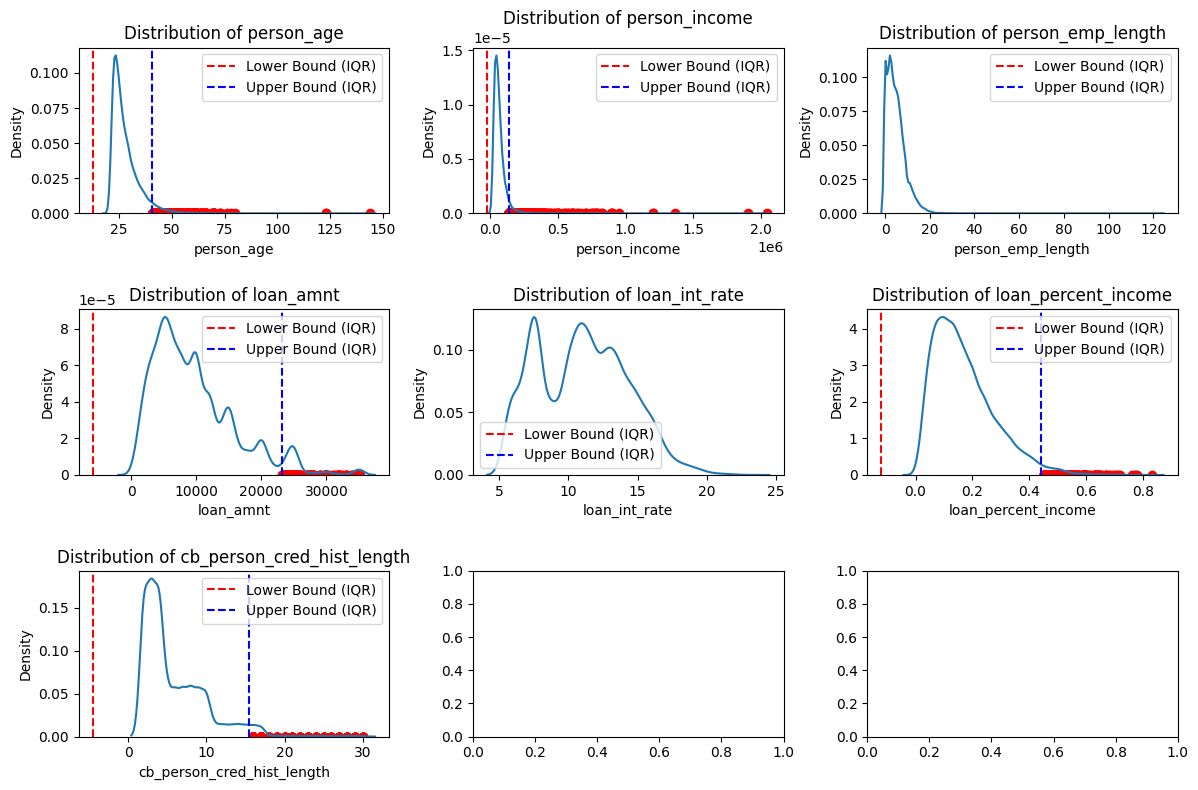

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

    # Calculate IQR
    q1 = np.percentile(X_train_num[col], 25)
    q3 = np.percentile(X_train_num[col], 75)
    iqr = q3 - q1

    # Define outlier bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Plot IQR bounds
    axes[i].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (IQR)')
    axes[i].axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound (IQR)')

    # Identify outliers
    outliers = X_train_num[(X_train_num[col] < lower_bound) | (X_train_num[col] > upper_bound)]
    axes[i].scatter(outliers[col], np.zeros_like(outliers[col]), color='red')

    axes[i].legend()

plt.tight_layout()
plt.show()

In [26]:
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,25932.000000,2.593200e+04,25219.000000,25932.000000,23433.000000,25932.000000,25932.000000
mean,27.721734,6.569430e+04,4.789405,9586.400008,11.013494,0.170452,5.791108
std,6.290102,5.186366e+04,4.164592,6316.672920,3.238078,0.106667,4.041546
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.470000,0.230000,8.000000
max,144.000000,2.039784e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


p_age > 80
person_income > 2000000
loan_amnt > 35000
loan_percent_income > 0.75
cb_person_cred_hist_length >25
loan_int_rate > 24.4
person_emp_length > 40

In [27]:
X_train[X_train['person_age']>80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0.26,N,4
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0.25,N,3


In [28]:
X_train[X_train['person_income']>2000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0.0,Y,15


In [29]:
X_train[X_train['person_emp_length']>40]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0.06,N,25
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0.10,N,4


its still save since it less than 10 % of the data

In [30]:
X_train[X_train['loan_amnt']>33000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
31616,40,114054,MORTGAGE,3.0,DEBTCONSOLIDATION,A,35000,8.90,0.31,N,14
15852,25,200000,MORTGAGE,3.0,VENTURE,E,35000,17.14,0.17,Y,3
27272,30,130000,MORTGAGE,3.0,EDUCATION,C,33250,13.06,0.26,Y,5
32301,53,85000,RENT,19.0,PERSONAL,D,35000,15.65,0.41,N,19
27853,27,300000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,35000,NaN,0.12,N,8
...,...,...,...,...,...,...,...,...,...,...,...
22980,28,60000,MORTGAGE,3.0,EDUCATION,B,35000,10.59,0.58,N,6
26019,28,95000,MORTGAGE,12.0,EDUCATION,B,35000,9.63,0.37,N,5
25957,28,93600,MORTGAGE,NaN,PERSONAL,A,35000,8.49,0.37,N,6
103,25,230000,MORTGAGE,5.0,MEDICAL,C,35000,13.99,0.15,N,4


In [31]:
X_train[X_train['loan_int_rate']>23]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29277,38,83000,RENT,3.0,HOMEIMPROVEMENT,G,22250,23.22,0.27,Y,12


In [32]:
X_train[X_train['loan_percent_income']>0.75]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
18203,30,32004,RENT,1.0,PERSONAL,B,24250,11.12,0.76,N,5
577,26,26000,RENT,10.0,EDUCATION,B,20050,9.76,0.77,N,2
640,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,0.83,N,3
23727,32,12000,RENT,1.0,MEDICAL,A,9325,8.38,0.78,N,6
571,21,19500,MORTGAGE,0.0,EDUCATION,B,15000,9.64,0.77,N,2


In [33]:
X_train[X_train['cb_person_cred_hist_length']>25]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32338,58,33600,RENT,6.0,EDUCATION,C,1500,14.79,0.04,N,28
32448,52,83200,RENT,0.0,DEBTCONSOLIDATION,C,8000,15.96,0.10,Y,30
32480,62,62050,MORTGAGE,29.0,MEDICAL,C,25000,13.43,0.34,Y,28
32311,59,175000,RENT,3.0,PERSONAL,B,12000,10.59,0.07,N,27
32498,61,78000,MORTGAGE,1.0,PERSONAL,D,8525,14.54,0.11,Y,27
...,...,...,...,...,...,...,...,...,...,...,...
32564,53,45000,RENT,0.0,PERSONAL,C,5600,13.79,0.12,N,28
32554,60,98000,RENT,1.0,HOMEIMPROVEMENT,D,15000,16.29,0.15,N,29
32372,53,60000,RENT,0.0,MEDICAL,A,4425,8.90,0.07,N,29
32351,58,39996,RENT,2.0,VENTURE,B,2500,10.37,0.06,N,27


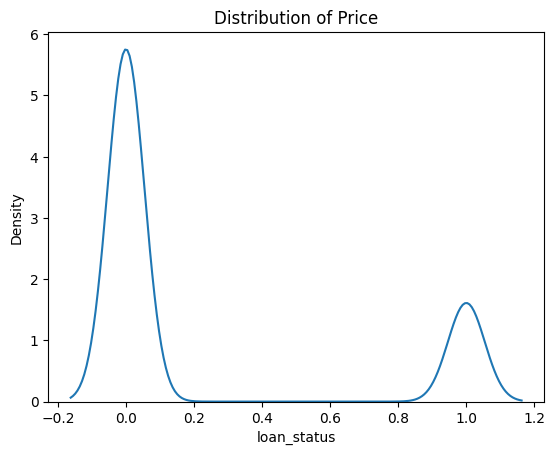

In [34]:
sns.kdeplot(y_train)
plt.title(f'Distribution of Price')
plt.show()

In [35]:
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
30,21,11520,OWN,5.0,MEDICAL,B,2000,11.12,0.17,N,3,1
25221,28,81120,MORTGAGE,5.0,HOMEIMPROVEMENT,B,5200,11.49,0.06,N,7,0
32528,65,120000,MORTGAGE,0.0,PERSONAL,B,12000,11.48,0.10,N,21,0
9322,26,62000,RENT,7.0,PERSONAL,C,8000,12.99,0.13,N,4,0
7010,26,51000,MORTGAGE,2.0,MEDICAL,A,4000,5.99,0.08,N,4,0


In [36]:
idx_to_drop = train_data[
    (train_data['person_age']>80) |
    (train_data['person_emp_length']>40) |
    (train_data['loan_amnt']>33000) |
    (train_data['loan_int_rate']>23) |
    (train_data['loan_percent_income']>0.75) |
    (train_data['cb_person_cred_hist_length']>25) |
    (train_data['person_income']>2000000)
].index.tolist()

In [37]:
print(f'Number of index to drop:', len(idx_to_drop))
idx_to_drop

Number of index to drop: 243


[32338,
 31616,
 15852,
 32448,
 32480,
 27272,
 32311,
 32301,
 27853,
 29125,
 17852,
 17531,
 26668,
 27259,
 31476,
 14009,
 22,
 32498,
 372,
 27554,
 15866,
 13005,
 17865,
 31702,
 15296,
 32460,
 13856,
 32302,
 32465,
 31909,
 15738,
 14478,
 15706,
 17853,
 32124,
 25704,
 32367,
 32068,
 27870,
 17945,
 32309,
 363,
 17913,
 32304,
 12754,
 15671,
 17954,
 17841,
 18203,
 32383,
 32424,
 32495,
 32463,
 32556,
 25993,
 28201,
 17850,
 26590,
 32443,
 11333,
 26444,
 29277,
 32413,
 16500,
 31865,
 27493,
 12,
 15155,
 27848,
 32158,
 27500,
 16513,
 32366,
 17836,
 577,
 32458,
 15900,
 32471,
 57,
 32483,
 26491,
 13575,
 32384,
 32357,
 15907,
 13748,
 17864,
 15792,
 32440,
 32355,
 17861,
 15300,
 32527,
 15270,
 16420,
 28493,
 17871,
 28785,
 10715,
 32336,
 13272,
 25393,
 17885,
 17842,
 32560,
 24999,
 28344,
 15914,
 8,
 26909,
 20,
 29134,
 32313,
 12169,
 32548,
 32576,
 32446,
 32487,
 13753,
 27820,
 13218,
 26311,
 222,
 17843,
 14787,
 17939,
 26980,
 32299,


droping the outliers from the data

In [38]:
X_train_dropped = X_train.drop(index=idx_to_drop)
y_train_dropped = y_train.drop(index=idx_to_drop)

In [39]:
print('Shape of X train after dropped:', X_train_dropped.shape)
X_train_dropped.head()

Shape of X train after dropped: (25689, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30,21,11520,OWN,5.0,MEDICAL,B,2000,11.12,0.17,N,3
25221,28,81120,MORTGAGE,5.0,HOMEIMPROVEMENT,B,5200,11.49,0.06,N,7
32528,65,120000,MORTGAGE,0.0,PERSONAL,B,12000,11.48,0.10,N,21
9322,26,62000,RENT,7.0,PERSONAL,C,8000,12.99,0.13,N,4
7010,26,51000,MORTGAGE,2.0,MEDICAL,A,4000,5.99,0.08,N,4


In [40]:
print('Shape of y train after dropped:', y_train_dropped.shape)
y_train_dropped.head()

Shape of y train after dropped: (25689,)


30       1
25221    0
32528    0
9322     0
7010     0
Name: loan_status, dtype: int64

the distribution pretty much still the same, so we can continue our EDA

In [41]:
y_train_dropped.value_counts(normalize=True)

loan_status
0    0.782047
1    0.217953
Name: proportion, dtype: float64

In [42]:
y_test.value_counts(normalize=True)

loan_status
0    0.781308
1    0.218692
Name: proportion, dtype: float64

I'm splitting the training data into numerical and categorical features to preprocess them separately

In [43]:
def split_numerical_categorical(data, num_cols, cat_cols):
    """
    Splits the input DataFrame into numerical and categorical DataFrames based on the provided column names.

    Parameters:

    data : pandas.DataFrame
    The input DataFrame containing both numerical and categorical features.

    num_cols : list of str
    A list of column names representing numerical features.

    cat_cols : list of str
    A list of column names representing categorical features.

    Returns:

    numerical_data : pandas.DataFrame
    A DataFrame containing only the numerical features.

    categorical_data : pandas.DataFrame
    A DataFrame containing only the categorical features.

    """
    numerical_data = data[num_cols]
    categorical_data = data[cat_cols]
    print(f'Data num shape: {numerical_data.shape}')
    print(f'Data cat shape: {categorical_data.shape}')

    return numerical_data, categorical_data

In [44]:
num_cols=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income', 'cb_person_cred_hist_length']
cat_cols=['person_home_ownership','loan_intent','cb_person_default_on_file','loan_grade']

In [45]:
X_train_num, X_train_cat = split_numerical_categorical(data=X_train_dropped,num_cols=num_cols,cat_cols=cat_cols)

Data num shape: (25689, 7)
Data cat shape: (25689, 4)


Notice that some of the Q1 values are outside the main distribution, its because the data is right-skewed and has a long tail

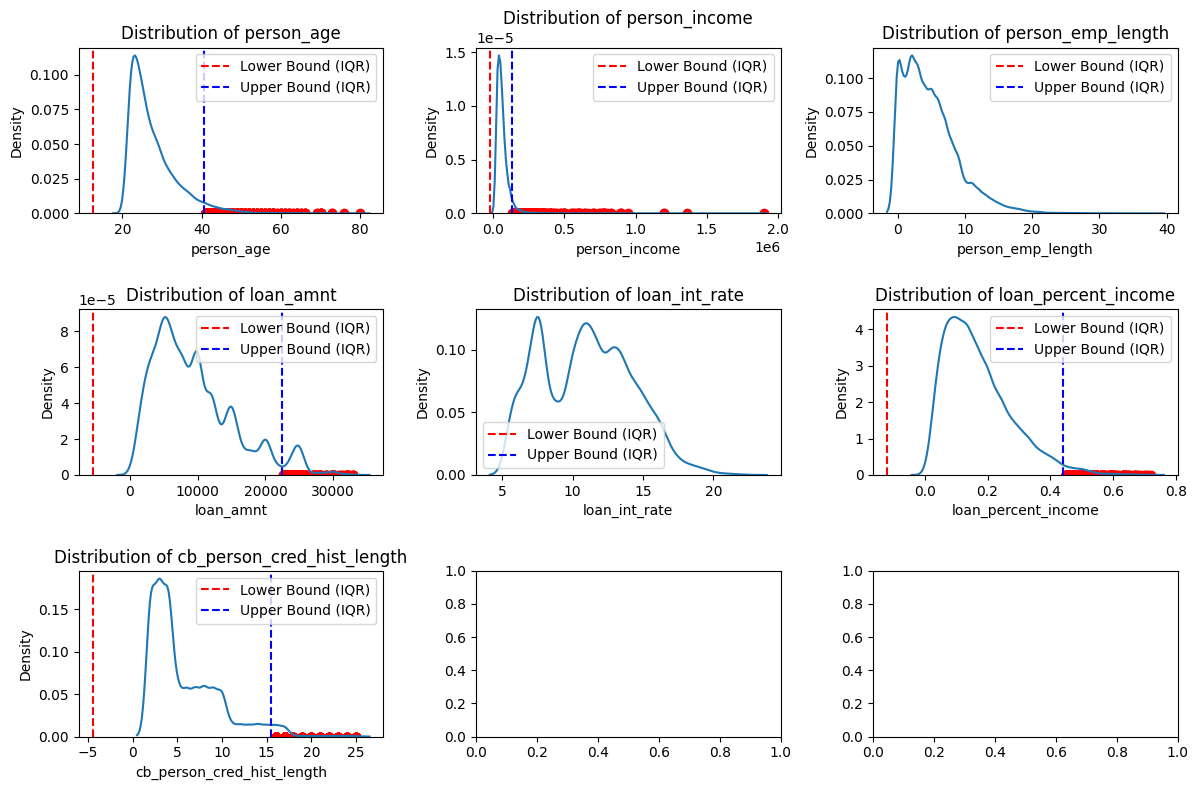

In [46]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

    # Calculate IQR
    q1 = np.percentile(X_train_num[col], 25)
    q3 = np.percentile(X_train_num[col], 75)
    iqr = q3 - q1

    # Define outlier bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Plot IQR bounds
    axes[i].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (IQR)')
    axes[i].axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound (IQR)')

    # Identify outliers
    outliers = X_train_num[(X_train_num[col] < lower_bound) | (X_train_num[col] > upper_bound)]
    axes[i].scatter(outliers[col], np.zeros_like(outliers[col]), color='red')

    axes[i].legend()

plt.tight_layout()
plt.show()

and, this is for the distribution of categorical data
we can see that there is 1 ordinal type category, which is loan_grade

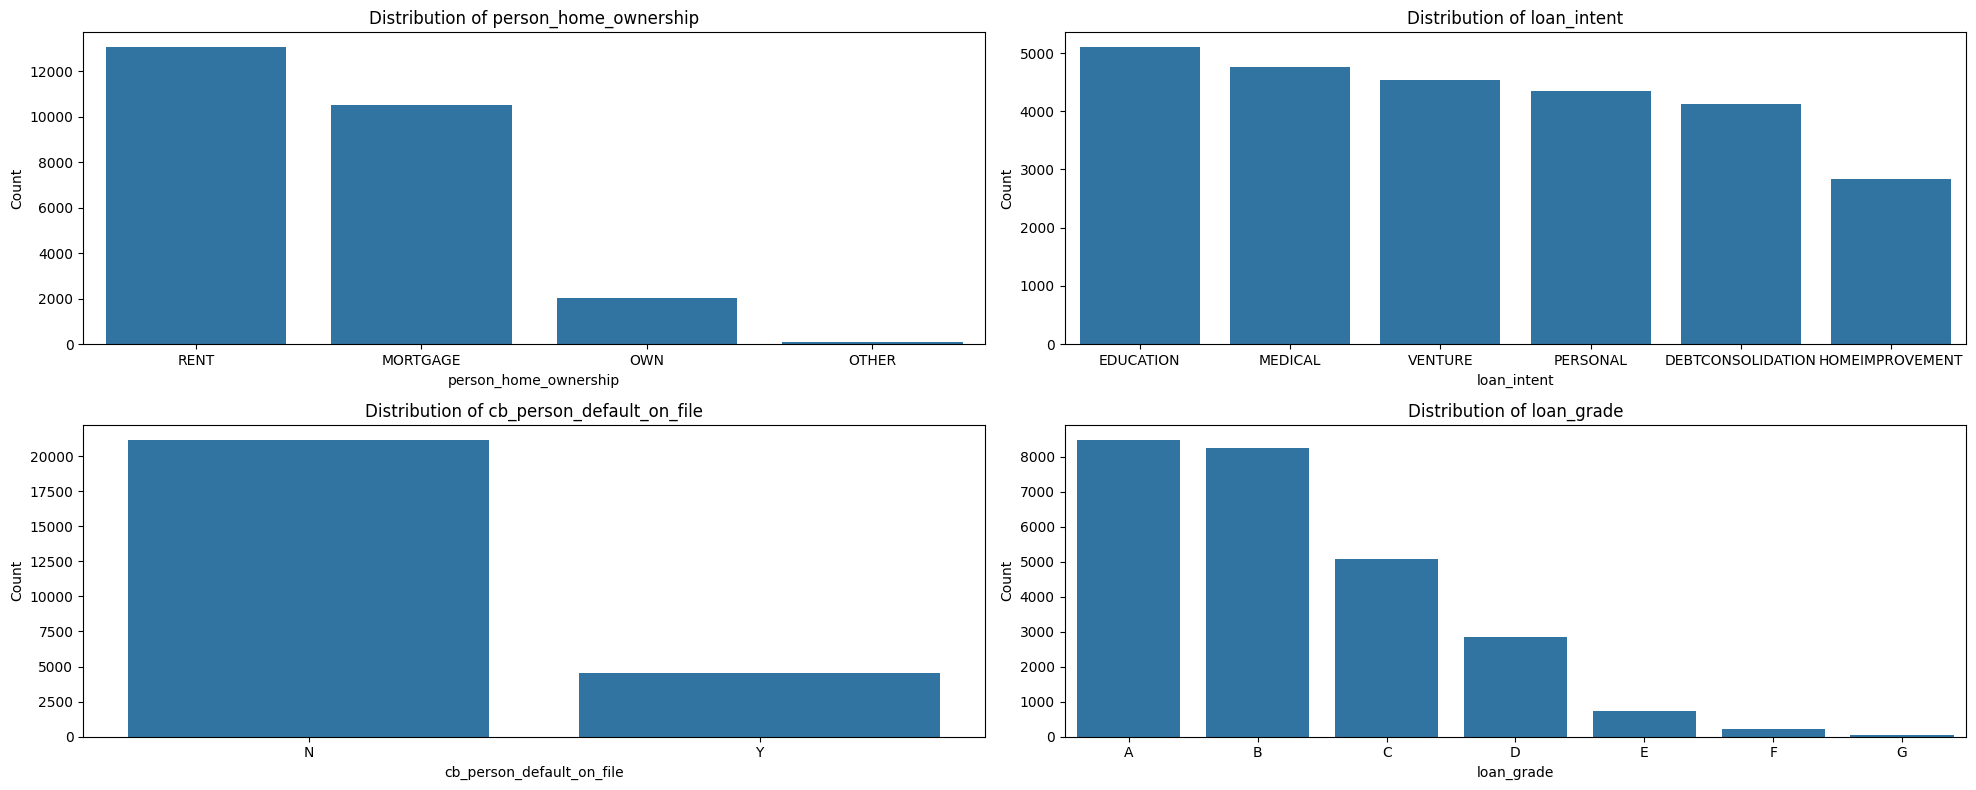

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_cat.columns):
    sns.barplot(
        x=X_train_cat[col].value_counts().index,
        y=X_train_cat[col].value_counts().values,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

checking how many data that is missing value (np.nan)

In [48]:
X_train_num.isna().sum(0)

person_age                       0
person_income                    0
person_emp_length              709
loan_amnt                        0
loan_int_rate                 2470
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

In [49]:
from sklearn.impute import SimpleImputer
def num_imputer_fit(data):
    '''
    Fit a SimpleImputer to the numerical data using the median strategy.

    Parameters

    data : pandas.DataFrame
    DataFrame containing numerical data with missing values (np.nan).

    Returns

    SimpleImputer
    A fitted SimpleImputer object configured to use the median strategy for imputation.
    '''
    imputer = SimpleImputer(strategy='median')
    imputer.fit(data)
    return imputer
def num_imputer_transform(data, imputer):
    '''
    Transform the numerical data using a fitted SimpleImputer.

    Parameters

    data : pandas.DataFrame
    DataFrame containing numerical data to be imputed.

    imputer : SimpleImputer
    A fitted SimpleImputer object that will be used to perform the imputation.

    Returns

    pandas.DataFrame
    DataFrame containing the imputed numerical data, with the same columns and index as the input data.
    '''
    imputed_data = imputer.transform(data)
    imputed_data_df = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)
    return imputed_data_df

In [50]:
num_imputer = num_imputer_fit(X_train_num)
X_train_num_imputed = num_imputer_transform(X_train_num, num_imputer)

the data has been imputed, that means, we already fill the missing value using median

In [51]:
X_train_num_imputed.isna().sum(0)

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

In [52]:
X_train_cat.isna().sum(0)

person_home_ownership        0
loan_intent                  0
cb_person_default_on_file    0
loan_grade                   0
dtype: int64

In [53]:
y.value_counts(normalize=True)

loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64

Non-Ordinal Features: Use one-hot encoding.
Binary Feature: Use label encoding.
Ordinal Feature: Use ordinal encoding.

In [54]:
from sklearn.preprocessing import OneHotEncoder
def cat_OHE_encoder_fit(data):
    '''
    Fit a OneHotEncoder to the categorical data.

    Parameters

    data : pandas.DataFrame
    DataFrame containing categorical data to be encoded.

    Returns

    OneHotEncoder
    A fitted OneHotEncoder object, which can be used to transform the data
    '''
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoder.fit(data)
    return encoder

def cat_OHE_encoder_transform(data, encoder):
    '''
    Parameters

    data : pandas.DataFrame
    DataFrame containing categorical data to be encoded.

    encoder : OneHotEncoder
    A fitted OneHotEncoder object used to encode the data.

    Returns

    pandas.DataFrame
    '''
    encoded_array = encoder.transform(data)
    feature_names = encoder.get_feature_names_out()
    cleaned_columns = [col.split('_')[-1] for col in feature_names]
    encoded_data = pd.DataFrame(encoded_array, columns=cleaned_columns, index=data.index)
    return encoded_data

In [55]:
from sklearn.preprocessing import LabelEncoder

def cat_label_encoder_fit(data):
    '''
    Fit a LabelEncoder to the categorical data.

    Parameters

    data : pandas.DataFrame
    DataFrame containing a single column of categorical data to be encoded.

    Returns

    LabelEncoder
    A fitted LabelEncoder object that can be used to transform the data.
    '''
    encoder = LabelEncoder()
    encoder.fit(data)
    return encoder

def cat_label_encoder_transform(data, encoder):
    '''
    Transform the categorical data using a fitted LabelEncoder.

    Parameters

    data : pandas.DataFrame
    DataFrame containing a single column of categorical data to be encoded.

    encoder : LabelEncoder
    A fitted LabelEncoder object used to encode the data.

    Returns

    pandas.DataFrame
    DataFrame containing the encoded data, with the same index as the input data.
    '''
    column_name = data.columns[0]
    encoded_array = encoder.transform(data[column_name])
    encoded_data = pd.DataFrame(encoded_array, columns=[column_name], index=data.index)
    return encoded_data

In [56]:
from sklearn.preprocessing import OrdinalEncoder

def cat_ordinal_encoder_fit(data, categories):
    '''
    Fit an OrdinalEncoder to the categorical data.

    Parameters

    data : pandas.DataFrame
        DataFrame containing a single column of categorical data to be encoded.

    categories : list of lists
        A list of lists specifying the categories for each feature. Each inner list corresponds to a feature and contains the categories in the order they should be encoded.

    Returns

    OrdinalEncoder
        A fitted OrdinalEncoder object that can be used to transform the data.
    '''
    encoder = OrdinalEncoder(categories=categories)
    encoder.fit(data)
    return encoder

def cat_ordinal_encoder_transform(data, encoder):
    '''
    Transform the categorical data using a fitted OrdinalEncoder.

    Parameters

    data : pandas.DataFrame
        DataFrame containing a single column of categorical data to be encoded.

    encoder : OrdinalEncoder
        A fitted OrdinalEncoder object used to encode the data.

    Returns

    pandas.DataFrame
        DataFrame containing the encoded data, with the same index as the input data.
    '''
    column_name = data.columns[0]
    encoded_array = encoder.transform(data)
    encoded_data = pd.DataFrame(encoded_array, columns=[column_name], index=data.index)
    return encoded_data

In [57]:
ohe_data = X_train_cat[['person_home_ownership', 'loan_intent']]
label_data = X_train_cat[['cb_person_default_on_file']]
ordinal_data = X_train_cat[['loan_grade']]
ordinal_categories = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]
cat_ohe_encoder = cat_OHE_encoder_fit(ohe_data)
X_train_cat_ohe_encoded = cat_OHE_encoder_transform(ohe_data,cat_ohe_encoder)
cat_label_encoder = cat_label_encoder_fit(label_data)
X_train_cat_label_encoded = cat_label_encoder_transform(label_data,cat_label_encoder)
cat_ordinal_encoded = cat_ordinal_encoder_fit(data=ordinal_data, categories=ordinal_categories)
X_train_cat_ordinal_encoded = cat_ordinal_encoder_transform(ordinal_data, cat_ordinal_encoded)
X_train_cat_encoded_concat = pd.concat([X_train_cat_ohe_encoded, X_train_cat_label_encoded, X_train_cat_ordinal_encoded], axis=1)

d:\app for data science\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
d:\app for data science\python\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
X_train_cat_encoded_concat.head()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file,loan_grade
30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0
25221,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0
32528,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
9322,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2.0
7010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0


In [59]:
X_train_cat_encoded_concat.shape

(25689, 12)

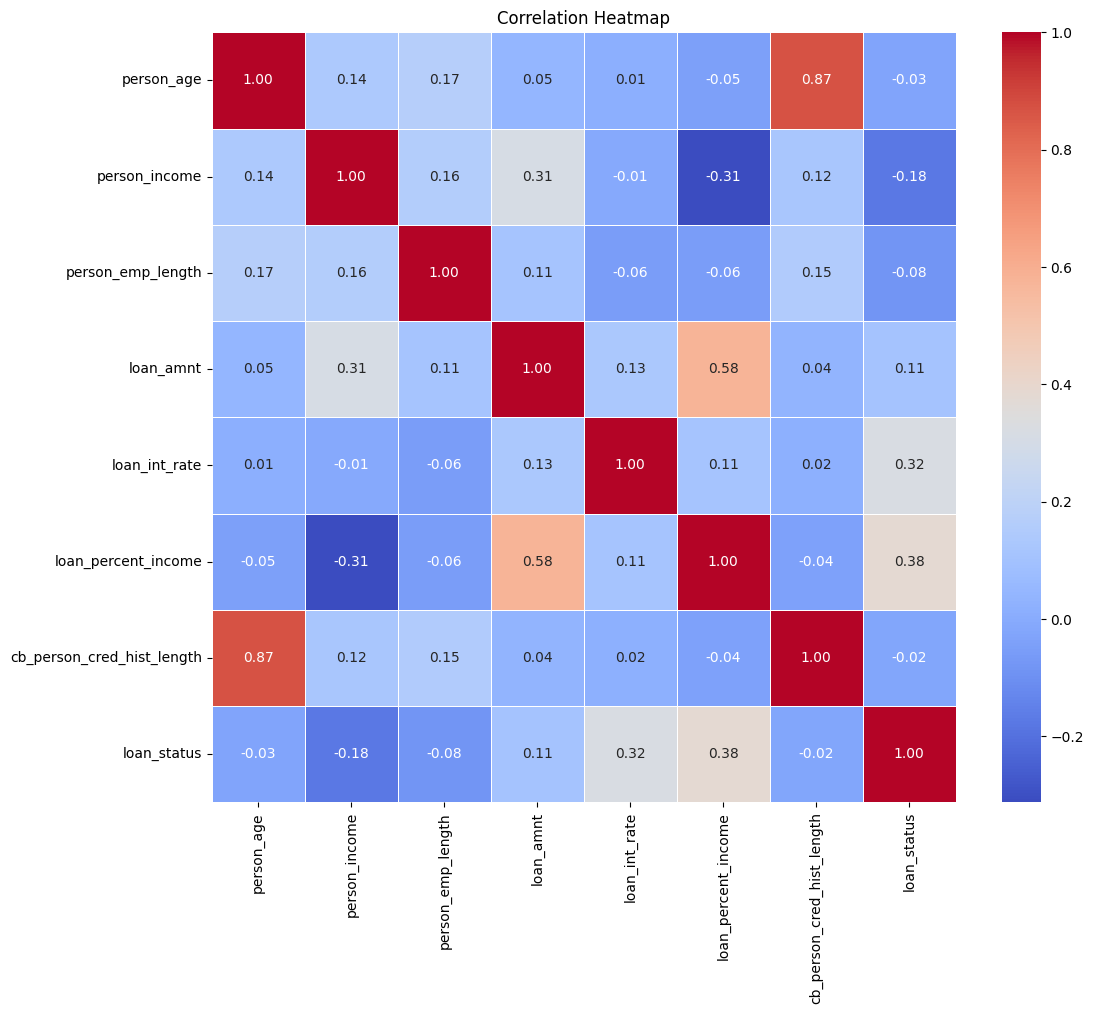

In [60]:
data_for_correlation = pd.concat([X_train_num_imputed, y_train_dropped], axis=1)


correlation_matrix_X_train_num = data_for_correlation.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_X_train_num, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Correlation Analysis

- Credit History Length (`cb_person_cred_hist_length`) and Age (`person_age`):
  There is a strong positive correlation between age and credit history length, indicate that older individuals tend to have longer credit histories.

- Income and Loan Amount:
  Income and loan amount are moderately positively correlated, indicate that higher income levels are associated with taking out larger loans.

- Loan Amount and Percentage of Income Spent on Loans:
  Loan amount and the percentage of income spent on loans show a moderate positive correlation, indicate that as the loan amount increases, a larger proportion of income is spent on servicing the loan.

- Interest Rate and Loan Status:
  Interest rate has a moderate positive correlation with loan status, indicate that higher interest rates are somewhat/kinda related to a higher likelihood of default.



In [61]:
def concat_data(num_data, cat_data):
    '''
    Concatenates numerical and categorical data into a single DataFrame.

    This function ensures that the indices of the numerical and categorical data match before concatenation. If the indices do not match, the categorical data is reindexed to match the numerical data.

    Parameters:
    - num_data (pd.DataFrame): DataFrame containing numerical data.
    - cat_data (pd.DataFrame): DataFrame containing categorical data.

    Returns:
    - concatenated_data (pd.DataFrame): DataFrame with both numerical and categorical data concatenated along columns.
    '''
    if not num_data.index.equals(cat_data.index):
        cat_data = cat_data.reindex(num_data.index)
    concatenated_data = pd.concat([num_data, cat_data], axis=1)
    print(f'Numerical data shape  : {num_data.shape}')
    print(f'Categorical data shape: {cat_data.shape}')
    print(f'Concat data shape     : {concatenated_data.shape}')
    return concatenated_data

In [62]:
X_train_concat = concat_data(X_train_num_imputed,X_train_cat_encoded_concat)

Numerical data shape  : (25689, 7)
Categorical data shape: (25689, 12)
Concat data shape     : (25689, 19)


In [63]:
X_train_concat.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file,loan_grade
30,21.0,11520.0,5.0,2000.0,11.12,0.17,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0
25221,28.0,81120.0,5.0,5200.0,11.49,0.06,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0
32528,65.0,120000.0,0.0,12000.0,11.48,0.10,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
9322,26.0,62000.0,7.0,8000.0,12.99,0.13,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2.0
7010,26.0,51000.0,2.0,4000.0,5.99,0.08,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0


In [64]:
from sklearn.preprocessing import StandardScaler
def fit_scaler(data):
    '''
    Fits a StandardScaler to the numerical data.

    This function computes the mean and standard deviation for each feature in the data to standardize them.

    Parameters:
    data (pd.DataFrame): DataFrame containing numerical data to be scaled.

    Returns:
    scaler (StandardScaler): A fitted StandardScaler object that can be used to transform the data.
    '''
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler
def transform_scaler(data, scaler):
    '''
    Transforms the numerical data using a fitted StandardScaler.

    This function scales the data based on the mean and standard deviation computed by the fitted StandardScaler.

    Parameters:
    data (pd.DataFrame): DataFrame containing numerical data to be scaled.
    scaler (StandardScaler): A fitted StandardScaler object used for scaling the data.

    Returns:
    scaled_data (pd.DataFrame): DataFrame containing the scaled numerical data.
    '''
    scaled_array = scaler.transform(data)
    scaled_data = pd.DataFrame(scaled_array, index=data.index, columns=data.columns)
    return scaled_data

In [65]:
scaler = fit_scaler(X_train_concat)
X_train_clean = transform_scaler(X_train_concat, scaler)

In [66]:
X_train_clean.shape

(25689, 19)

In [67]:
X_train_clean.describe().round(4)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file,loan_grade
count,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000,25689.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.2739,-1.2375,-1.1984,-1.4851,-1.8166,-1.6025,-0.9640,-0.8328,-0.0576,-0.2921,-1.0173,-0.4378,-0.4977,-0.3521,-0.4765,-0.4509,-0.4626,-0.4612,-1.0434
25%,-0.7720,-0.5400,-0.6939,-0.7364,-0.8173,-0.7524,-0.7050,-0.8328,-0.0576,-0.2921,-1.0173,-0.4378,-0.4977,-0.3521,-0.4765,-0.4509,-0.4626,-0.4612,-1.0434
50%,-0.2702,-0.2034,-0.1893,-0.2374,-0.0034,-0.1856,-0.4459,-0.8328,-0.0576,-0.2921,0.9830,-0.4378,-0.4977,-0.3521,-0.4765,-0.4509,-0.4626,-0.4612,-0.1857
75%,0.3989,0.2629,0.5675,0.4281,0.6867,0.5700,0.5902,1.2008,-0.0576,-0.2921,0.9830,-0.4378,-0.4977,-0.3521,-0.4765,-0.4509,-0.4626,-0.4612,0.6720
max,8.7627,37.2065,8.3881,3.9217,3.7369,5.1984,4.9936,1.2008,17.3558,3.4240,0.9830,2.2841,2.0092,2.8398,2.0985,2.2176,2.1618,2.1685,4.1028


In [68]:
def preprocess_data(data, num_cols,cat_cols,ohe_feat, label_feat, ordinal_feat,num_imputer, cat_ohe_encoder,cat_label_encoder,cat_ordinal_encoded,scaler):
    num_data = data[num_cols]
    cat_data = data[cat_cols]
    ohe_data = cat_data[ohe_feat]
    label_data = cat_data[label_feat]
    ordinal_data = cat_data[ordinal_feat]
    num_data_imputed = num_imputer_transform(num_data, num_imputer)
    cat_ohe_data_encoded = cat_OHE_encoder_transform(ohe_data,cat_ohe_encoder)
    cat_label_data_encoded = cat_label_encoder_transform(label_data,cat_label_encoder)
    cat_ordinal_data_encoded = cat_ordinal_encoder_transform(ordinal_data, cat_ordinal_encoded)
    cat_data_concat = pd.concat([cat_ohe_data_encoded, cat_label_data_encoded, cat_ordinal_data_encoded], axis=1)
    processed_data = concat_data(num_data_imputed, cat_data_concat)
    print(f"Original data shape:{processed_data.shape}")
    clean_data = transform_scaler(processed_data, scaler)
    print(f'Mapped data shape  : {clean_data.shape}')
    return clean_data


In [69]:

num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
ohe_feat = ['person_home_ownership', 'loan_intent']
label_feat = ['cb_person_default_on_file']
ordinal_feat = ['loan_grade']
cat_cols = ['person_home_ownership', 'loan_intent','cb_person_default_on_file','loan_grade']


X_train_clean = preprocess_data(
    data=X_train_dropped,
    num_cols=num_cols,
    cat_cols=cat_cols,
    ohe_feat=ohe_feat,
    label_feat=label_feat,
    ordinal_feat=ordinal_feat,
    num_imputer=num_imputer,
    cat_ohe_encoder = cat_ohe_encoder,
    cat_label_encoder = cat_label_encoder,
    cat_ordinal_encoded = cat_ordinal_encoded,
    scaler=scaler
)


Numerical data shape  : (25689, 7)
Categorical data shape: (25689, 12)
Concat data shape     : (25689, 19)
Original data shape:(25689, 19)
Mapped data shape  : (25689, 19)


In [70]:
y_train_dropped.shape

(25689,)

In [71]:
X_valid_clean = preprocess_data(
    data=X_valid,
    num_cols=num_cols,
    cat_cols=cat_cols,
    ohe_feat=ohe_feat,
    label_feat=label_feat,
    ordinal_feat=ordinal_feat,
    num_imputer=num_imputer,
    cat_ohe_encoder = cat_ohe_encoder,
    cat_label_encoder = cat_label_encoder,
    cat_ordinal_encoded = cat_ordinal_encoded,
    scaler=scaler
)

X_test_clean = preprocess_data(
    data=X_test,
    num_cols=num_cols,
    cat_cols=cat_cols,
    ohe_feat=ohe_feat,
    label_feat=label_feat,
    ordinal_feat=ordinal_feat,
    num_imputer=num_imputer,
    cat_ohe_encoder = cat_ohe_encoder,
    cat_label_encoder = cat_label_encoder,
    cat_ordinal_encoded = cat_ordinal_encoded,
    scaler=scaler
)

Numerical data shape  : (3242, 7)
Categorical data shape: (3242, 12)
Concat data shape     : (3242, 19)
Original data shape:(3242, 19)
Mapped data shape  : (3242, 19)
Numerical data shape  : (3242, 7)
Categorical data shape: (3242, 12)
Concat data shape     : (3242, 19)
Original data shape:(3242, 19)
Mapped data shape  : (3242, 19)


In [72]:

def extract_cv_results(cv_obj):
    '''
    Extracts the best scores and parameters from a cross-validation object.

    Parameters:
    cv_obj (GridSearchCV or RandomizedSearchCV): The fitted cross-validation object.

    Returns:
    best_train_score (float): The mean training score of the best model.
    best_valid_score (float): The best validation score.
    best_params (dict): The hyperparameters of the best model.
    '''

    best_train_score = cv_obj.cv_results_['mean_train_score'][cv_obj.best_index_]

    best_valid_score = cv_obj.best_score_

    best_params = cv_obj.best_params_

    return best_train_score, best_valid_score, best_params


im using stratified since the data is imbalanced,
but before we create a best model, we need to use scoring that threshold independent, which is ROC - AUC, so our model can distinguishes between classes

In [73]:
from sklearn.metrics import make_scorer, roc_auc_score

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

In [74]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

param_grid_base = {'strategy': ['stratified']}
baseline_model = DummyClassifier()
reg_base = GridSearchCV(baseline_model, param_grid_base, scoring=roc_auc_scorer, return_train_score=True)
reg_base.fit(X_train_clean, y_train_dropped)


GridSearchCV(estimator=DummyClassifier(),
             param_grid={'strategy': ['stratified']}, return_train_score=True,
             scoring=make_scorer(roc_auc_score, needs_proba=True))

im not using SVM since, the process takes ages, so i exclude it, and i already process it too, the performance between SVM with RF, RF still better than SVM,so this CODE just a refined version from my sandbox code, so ill be using, Decision Tree, Random Forest, Logistic Regression, Adaboost on Decision Tree

In [75]:
train_base, valid_base, best_param_base = extract_cv_results(reg_base)

print(f'Train score - Baseline model: {train_base}')
print(f'Valid score - Baseline model: {valid_base}')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 0.49849443346229083
Valid score - Baseline model: 0.49781802181737145
Best Params - Baseline model: {'strategy': 'stratified'}


Some of the parameters I used are taken from graphs in 'Introduction to Statistical Learning' and 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.' Some values were derived from the last exercise, and others were adjusted to find better tuning

In [76]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {
    'max_depth': [2, 10, 30, 100, None],
    'min_samples_split': [2, 25, 50, 100, 150],
    'min_samples_leaf': [2, 5, 10, 20]}
tree_model = DecisionTreeClassifier()

clas_tree = GridSearchCV(tree_model, param_grid_tree, scoring=roc_auc_scorer, return_train_score=True)
clas_tree.fit(X_train_clean, y_train_dropped)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 10, 30, 100, None],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 25, 50, 100, 150]},
             return_train_score=True,
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [77]:
train_tree, valid_tree, best_param_tree = extract_cv_results(clas_tree)

print(f'Train score - Decision Tree model: {train_tree}')
print(f'Valid score - Decision Tree model: {valid_tree}')
print(f'Best Params - Decision Tree model: {best_param_tree}')

Train score - Decision Tree model: 0.9329047194431721
Valid score - Decision Tree model: 0.9175078253398772
Best Params - Decision Tree model: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 150}


In [78]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100,150],
    'max_depth': [10, 20,50],
    'min_samples_split': [5,10,25],
    'min_samples_leaf': [2, 5,10],
    'bootstrap': [True]
}

rf_model = RandomForestClassifier()

clas_rf = GridSearchCV(rf_model, param_grid_rf, scoring=roc_auc_scorer, return_train_score=True)
clas_rf.fit(X_train_clean, y_train_dropped)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 50],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [5, 10, 25],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True,
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [79]:
train_rf, valid_rf, best_param_rf = extract_cv_results(clas_rf)

print(f'Train score - Decision Tree model: {train_rf}')
print(f'Valid score - Decision Tree model: {valid_rf}')
print(f'Best Params - Decision Tree model: {best_param_rf}')

Train score - Decision Tree model: 0.9995883102026557
Valid score - Decision Tree model: 0.930921729793168
Best Params - Decision Tree model: {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [80]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': np.logspace(-7, 7, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200]
}

lr_model = LogisticRegression()

clas_lr = GridSearchCV(lr_model, param_grid_lr, scoring=roc_auc_scorer, return_train_score=True)
clas_lr.fit(X_train_clean, y_train_dropped)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-07, 3.59381366e-06, 1.29154967e-04, 4.64158883e-03,
       1.66810054e-01, 5.99484250e+00, 2.15443469e+02, 7.74263683e+03,
       2.78255940e+05, 1.00000000e+07]),
                         'max_iter': [100, 200], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             return_train_score=True,
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [81]:
train_lr, valid_lr, best_param_lr = extract_cv_results(clas_lr)

print(f'Train score - Decision Tree model: {train_lr}')
print(f'Valid score - Decision Tree model: {valid_lr}')
print(f'Best Params - Decision Tree model: {best_param_lr}')

Train score - Decision Tree model: 0.8659695108194917
Valid score - Decision Tree model: 0.8654148083274189
Best Params - Decision Tree model: {'C': 0.1668100537200059, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [82]:
from sklearn.ensemble import AdaBoostClassifier


base_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=50)
# base_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=150)
ada_boost = AdaBoostClassifier(base_estimator=base_tree)

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_ada = GridSearchCV(ada_boost, param_grid_ada, scoring=roc_auc_scorer, return_train_score=True)
grid_ada.fit(X_train_clean, y_train_dropped)

d:\app for data science\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\app for data science\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\app for data science\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\app for data science\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\app for data science\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\ap

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=50)),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True,
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [83]:
train_adadt, valid_adadt, best_param_adadt = extract_cv_results(grid_ada)

print(f'Train score - Decision Tree model: {train_adadt}')
print(f'Valid score - Decision Tree model: {valid_adadt}')
print(f'Best Params - Decision Tree model: {best_param_adadt}')

Train score - Decision Tree model: 0.9956201474915037
Valid score - Decision Tree model: 0.9343384115084508
Best Params - Decision Tree model: {'learning_rate': 0.01, 'n_estimators': 100}


In [84]:
summary_df = pd.DataFrame(
    data={
        'model': ['Baseline', 'Decision Tree', 'Random FOrest', 'Logistic Regression', 'adaboost on DT'],
        'train_score': [train_base, train_tree, train_rf, train_lr,train_adadt],
        'valid_score': [valid_base, valid_tree, valid_rf,valid_lr, valid_adadt],
        'best_params': [best_param_base, best_param_tree, best_param_rf, best_param_lr,best_param_adadt]
    }
)

summary_df['train_score']
summary_df['valid_score']
summary_df

,model,train_score,valid_score,best_params
0,Baseline,0.498494,0.497818,{'strategy': 'stratified'}
1,Decision Tree,0.932905,0.917508,"{'max_depth': 10, 'min_samples_leaf': 20, 'min..."
2,Random FOrest,0.999588,0.930922,"{'bootstrap': True, 'max_depth': 50, 'min_samp..."
3,Logistic Regression,0.865970,0.865415,"{'C': 0.1668100537200059, 'max_iter': 100, 'pe..."
4,adaboost on DT,0.995620,0.934338,"{'learning_rate': 0.01, 'n_estimators': 100}"


we can see the result, adaboost on DT have the best validscore than RF, hence adaboost DT will be the best model

i wont make a variable best_model, because sometimes my computer got crash

In [85]:
from sklearn.metrics import classification_report

In [86]:
from sklearn.metrics import confusion_matrix

Basemodel perfromance on test data

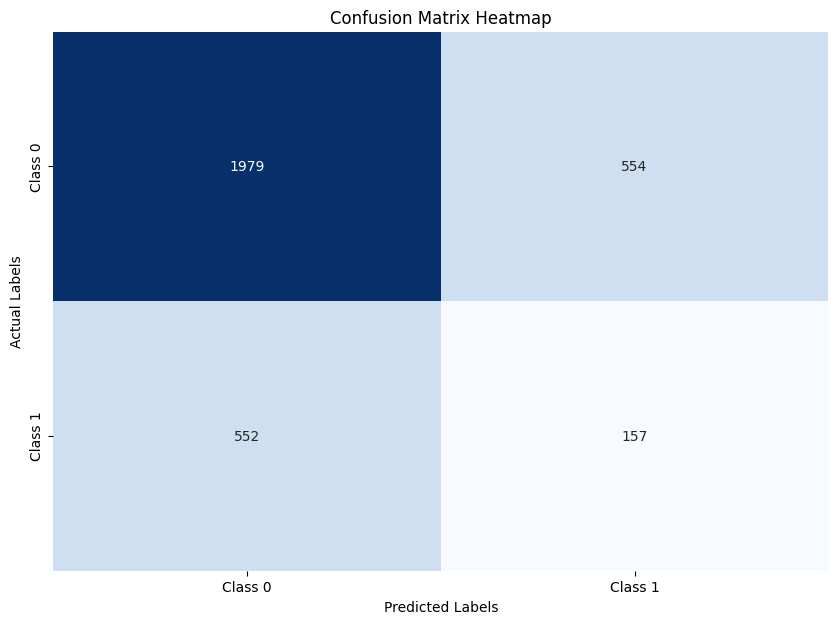

In [87]:
y_test_pred_base = reg_base.predict(X_test_clean)
conf_matrix_base = confusion_matrix(y_test, y_test_pred_base)
report_base = classification_report(y_test, y_test_pred_base, output_dict=True)

precision = {class_name: report_base[class_name]['precision'] for class_name in report_base if class_name != 'accuracy'}
recall = {class_name: report_base[class_name]['recall'] for class_name in report_base if class_name != 'accuracy'}
f1 = {class_name: report_base[class_name]['f1-score'] for class_name in report_base if class_name != 'accuracy'}

conf_matrix_df2 = pd.DataFrame(conf_matrix_base, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [88]:
print("Precision per class:")
for class_name, precision_score in precision.items():
    print(f"{class_name}: {precision_score:.2f}")

print("\nRecall per class:")
for class_name, recall_score in recall.items():
    print(f"{class_name}: {recall_score:.2f}")

print("\nF1-Score per class:")
for class_name, f1_score in f1.items():
    print(f"{class_name}: {f1_score:.2f}")

Precision per class:
0: 0.78
1: 0.22
macro avg: 0.50
weighted avg: 0.66

Recall per class:
0: 0.78
1: 0.22
macro avg: 0.50
weighted avg: 0.66

F1-Score per class:
0: 0.78
1: 0.22
macro avg: 0.50
weighted avg: 0.66


In [89]:
y_test_pred = grid_ada.predict(X_test_clean)

In [90]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

Adaboost DT model performance on test data

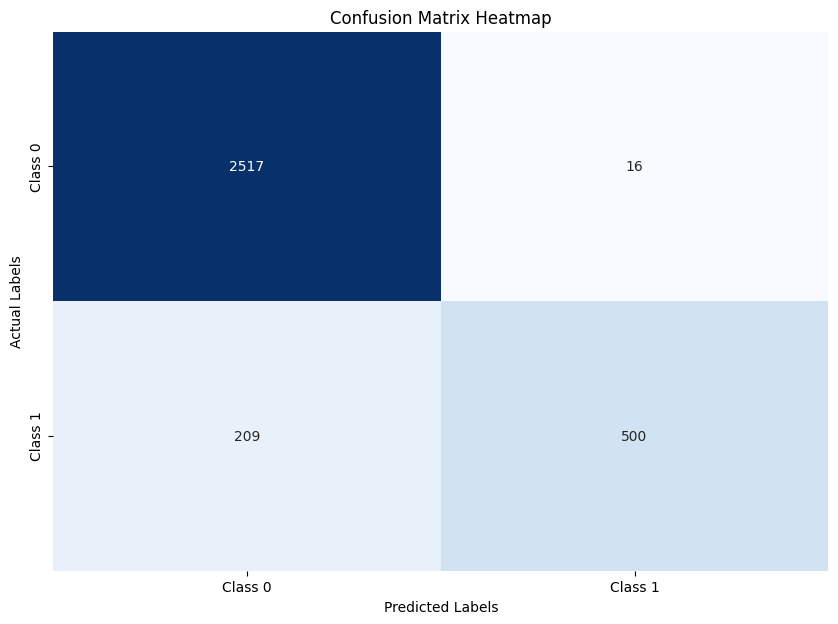

In [91]:
report = classification_report(y_test, y_test_pred, output_dict=True)

precision = {class_name: report[class_name]['precision'] for class_name in report if class_name != 'accuracy'}
recall = {class_name: report[class_name]['recall'] for class_name in report if class_name != 'accuracy'}
f1 = {class_name: report[class_name]['f1-score'] for class_name in report if class_name != 'accuracy'}

conf_matrix_df = pd.DataFrame(conf_matrix, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [92]:
print("Precision per class:")
for class_name, precision_score in precision.items():
    print(f"{class_name}: {precision_score:.2f}")

print("\nRecall per class:")
for class_name, recall_score in recall.items():
    print(f"{class_name}: {recall_score:.2f}")

print("\nF1-Score per class:")
for class_name, f1_score in f1.items():
    print(f"{class_name}: {f1_score:.2f}")


Precision per class:
0: 0.92
1: 0.97
macro avg: 0.95
weighted avg: 0.93

Recall per class:
0: 0.99
1: 0.71
macro avg: 0.85
weighted avg: 0.93

F1-Score per class:
0: 0.96
1: 0.82
macro avg: 0.89
weighted avg: 0.93


we can see that out best model have better either f1 score, recall, and precision than our base model

In [93]:
from sklearn.metrics import precision_recall_curve

y_probs = grid_ada.predict_proba(X_train_clean)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_train_dropped, y_probs)
# im using f1 score to tune the threshold since it give balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)

optimal_idx = (f1_scores).argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

y_test_pred_optimal = (y_probs >= optimal_threshold).astype(int)


Optimal Threshold: 0.29076939602435514


In [94]:

def calculate_cost(conf_matrix, cost_fp, cost_fn):
    tn, fp, fn, tp = conf_matrix.ravel()
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    return total_cost

y_test_prob = grid_ada.predict_proba(X_test_clean)[:, 1]

y_test_pred_optimal = (y_test_prob >= optimal_threshold).astype(int)

conf_matrix_baseline = confusion_matrix(y_test, y_test_pred_base)
conf_matrix_best = confusion_matrix(y_test, y_test_pred_optimal)

cost_fn = 35000000
cost_fp = 10000000

total_cost_baseline = calculate_cost(conf_matrix_baseline, cost_fp, cost_fn)
total_cost_best = calculate_cost(conf_matrix_best, cost_fp, cost_fn)

print("Baseline Model Confusion Matrix:")
print(conf_matrix_baseline)
print(f"Total Cost: {total_cost_baseline/1000000:.2f} juta Rupiah")

print("\nBest Model Confusion Matrix:")
print(conf_matrix_best)
print(f"Total Cost: {total_cost_best/1000000:.2f} juta Rupiah")

if total_cost_best < total_cost_baseline:
    print("\nThe best model is better.")
else:
    print("\nThe baseline model is better .")



Baseline Model Confusion Matrix:
[[1979  554]
 [ 552  157]]
Total Cost: 24860.00 juta Rupiah

Best Model Confusion Matrix:
[[2449   84]
 [ 167  542]]
Total Cost: 6685.00 juta Rupiah

The best model is better.


there is differencies between the first confusion matrix and tune threshold confusion matrix its because the tuned threshold changes the cutoff point for classifying predictions as positive or negative, affecting the confusion matrix.